In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

In [171]:
scaler = StandardScaler()

X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [172]:
def regression_plot(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, color='red')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

Ridge Regression
R2 train score = 0.48475635953533747
R2 test score = 0.640099009802706
b: 151.20113314447593, 
w= [ -0.89138361 -12.39786499  23.31789594  17.28140115 -33.86163059
  17.20293351   4.84189346  12.70508244  31.34982638   3.39397435]
Ridge Regression MSE: 2094.40


/var/folders/5q/817_6zy5137_h6wwwwxjf8n00000gn/T/ipykernel_86885/2729033676.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


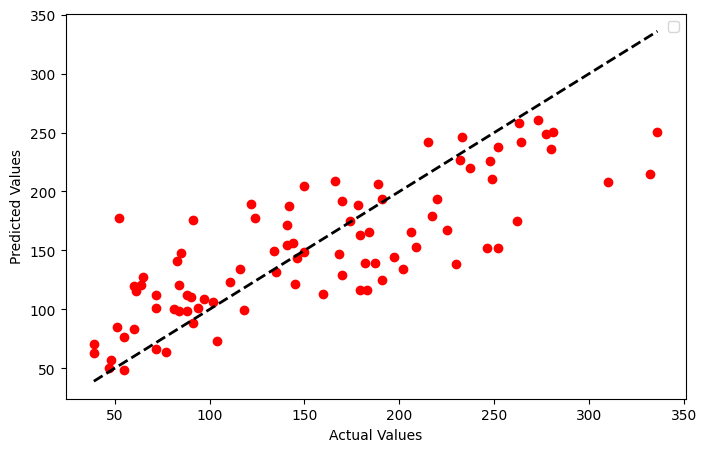

In [173]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)

print('Ridge Regression')
print('R2 train score =', ridge.score(X_train_scaled, y_train))
print('R2 test score =', ridge.score(X_test_scaled, y_test))
print('b: {}, \nw= {}'.format(ridge.intercept_, ridge.coef_))
print(f'Ridge Regression MSE: {ridge_mse:.2f}')

regression_plot(y_test=y_test, y_pred=y_pred_ridge)

Lasso Regression
R2 train score = 0.4843101030575986
R2 test score = 0.6415310212596038
b: 151.20113314447593, 
w= [ -0.72359696 -12.2957345   23.34963828  17.16146621 -28.24921617
  13.07536303   1.95818237  11.24337061  29.48252866   3.28984317]
Lasso Regression MSE: 2086.07


/var/folders/5q/817_6zy5137_h6wwwwxjf8n00000gn/T/ipykernel_86885/2729033676.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


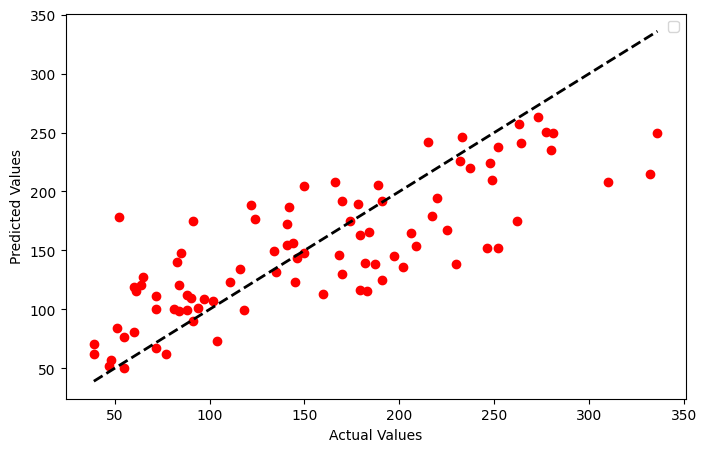

In [174]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print('Lasso Regression')
print('R2 train score =', lasso.score(X_train_scaled, y_train))
print('R2 test score =', lasso.score(X_test_scaled, y_test))
print('b: {}, \nw= {}'.format(lasso.intercept_, lasso.coef_))
print(f'Lasso Regression MSE: {lasso_mse:.2f}')

regression_plot(y_test=y_test, y_pred=y_pred_lasso)

Polynomial Regression (degree 2)
R2 train score = 0.5855803639888273
R2 test score = 0.5399135532049754
Polynomial Regression (degree 2) MSE: 2677.42


/var/folders/5q/817_6zy5137_h6wwwwxjf8n00000gn/T/ipykernel_86885/2729033676.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


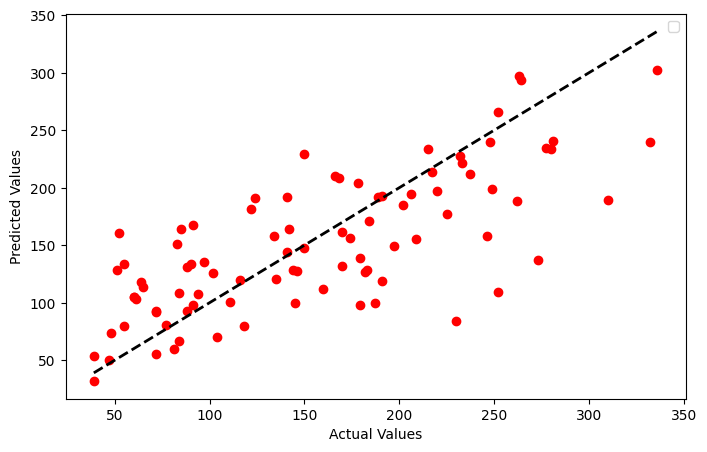

In [175]:
poly = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), Ridge(alpha=1.0))
poly.fit(X_train_scaled, y_train)
y_pred_poly = poly.predict(X_test_scaled)
poly_mse = mean_squared_error(y_test, y_pred_poly)

print('Polynomial Regression (degree 2)')
print('R2 train score =', poly.score(X_train_scaled, y_train))
print('R2 test score =', poly.score(X_test_scaled, y_test))
print(f'Polynomial Regression (degree 2) MSE: {poly_mse:.2f}')

regression_plot(y_test=y_test, y_pred=y_pred_poly)